In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

In [5]:
! pwd

/home/quark/Documents/projects/TFM/Notebooks


## In preliminar exploration there is the code for merging meteocat data with the original data

In [6]:
temp_bcn = pd.read_csv('/home/quark/Documents/projects/TFM/Databases/AEMET/temp_bcn_fabra.csv', delimiter='\t')

In [7]:
temp_bcn.head()

,FECHA,T. Máxima,T.Mínima
0,01-01-2017,11.8,3.0
1,02-01-2017,13.1,6.5
2,03-01-2017,11.0,4.5
3,04-01-2017,12.1,7.3
4,05-01-2017,12.1,5.2


In [8]:
temp_bcn.columns = ['date', 'maxtemp', 'mintemp']

In [9]:
temp_bcn.describe(include='all')

,date,maxtemp,mintemp
count,758,758.000000,758.000000
unique,758,NaN,NaN
top,19-12-2018,NaN,NaN
freq,1,NaN,NaN
mean,NaN,20.073747,12.345778
std,NaN,6.789565,6.092690
min,NaN,1.700000,-2.400000
25%,NaN,14.400000,7.400000
50%,NaN,19.800000,12.000000
75%,NaN,25.275000,17.300000


In [10]:
temp_bcn.dtypes

date        object
maxtemp    float64
mintemp    float64
dtype: object

In [11]:
temp_bcn['date'] = temp_bcn['date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y'))

In [12]:
temp_bcn.dtypes

date       datetime64[ns]
maxtemp           float64
mintemp           float64
dtype: object

In [13]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/datos.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)

In [14]:
original_df.dtypes

Id                              int64
CustomerId                      int64
SiteId                          int64
Timestamp                       int64
Year                            int64
Month                           int64
Day                             int64
Hour                            int64
Minute                          int64
TotalEntries                    int64
TotalOuts                       int64
TotalAccesses                   int64
TotalFraudEntries               int64
TotalFraudOuts                  int64
TotalFraud                      int64
TotalEntriesMen               float64
TotalEntriesWoman             float64
TotalEntriesAverageAge        float64
MenEntriesAverageAge          float64
WomenEntriesAverageAge        float64
TotalEntriesGroupAge_0_14     float64
TotalEntriesGroupAge_15_19    float64
TotalEntriesGroupAge_20_24    float64
TotalEntriesGroupAge_25_29    float64
TotalEntriesGroupAge_30_34    float64
TotalEntriesGroupAge_35_39    float64
TotalEntries

In [15]:
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')

In [16]:
original_df['date'] = pd.to_datetime(original_df['Timestamp'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')))

In [69]:
test_df = original_df.merge(temp_bcn, how='left', left_on='date', right_on='date')

In [70]:
test_df.head()

,Id,CustomerId,SiteId,Timestamp,Year,Month,Day,Hour,Minute,TotalEntries,...,WomenEntriesGroupAge_35_39,WomenEntriesGroupAge_40_44,WomenEntriesGroupAge_45_49,WomenEntriesGroupAge_50_54,WomenEntriesGroupAge_55_59,WomenEntriesGroupAge_60_99,GeneratedByDaysPopulator,date,maxtemp,mintemp
0,2305,11,2,2017-01-04 00:00:00,2017,1,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,12.1,7.3
1,2306,11,2,2017-01-04 00:30:00,2017,1,4,0,30,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,12.1,7.3
2,2307,11,2,2017-01-04 01:00:00,2017,1,4,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,12.1,7.3
3,2308,11,2,2017-01-04 01:30:00,2017,1,4,1,30,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,12.1,7.3
4,2309,11,2,2017-01-04 02:00:00,2017,1,4,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,12.1,7.3


In [71]:
test_df = test_df[['Timestamp', 'date', 'SiteId', 'TotalEntries', 'maxtemp', 'mintemp', 'Month']]

In [72]:
test_df.sort_values(by=['SiteId','Timestamp'], inplace=True)

In [73]:
test_df[test_df['SiteId'] == 1].head()

,Timestamp,date,SiteId,TotalEntries,maxtemp,mintemp,Month
33025,2018-11-27 00:00:00,2018-11-27,1,0,13.8,5.8,11
33027,2018-11-27 00:30:00,2018-11-27,1,0,13.8,5.8,11
33028,2018-11-27 01:00:00,2018-11-27,1,0,13.8,5.8,11
33030,2018-11-27 01:30:00,2018-11-27,1,0,13.8,5.8,11
33032,2018-11-27 02:00:00,2018-11-27,1,0,13.8,5.8,11


(array([1739., 1000.,  348.,  223.,  320.,  353.,  191.,  106.,   36.,
           4.]),
 array([   0. ,  208.2,  416.4,  624.6,  832.8, 1041. , 1249.2, 1457.4,
        1665.6, 1873.8, 2082. ]),
 <a list of 10 Patch objects>)

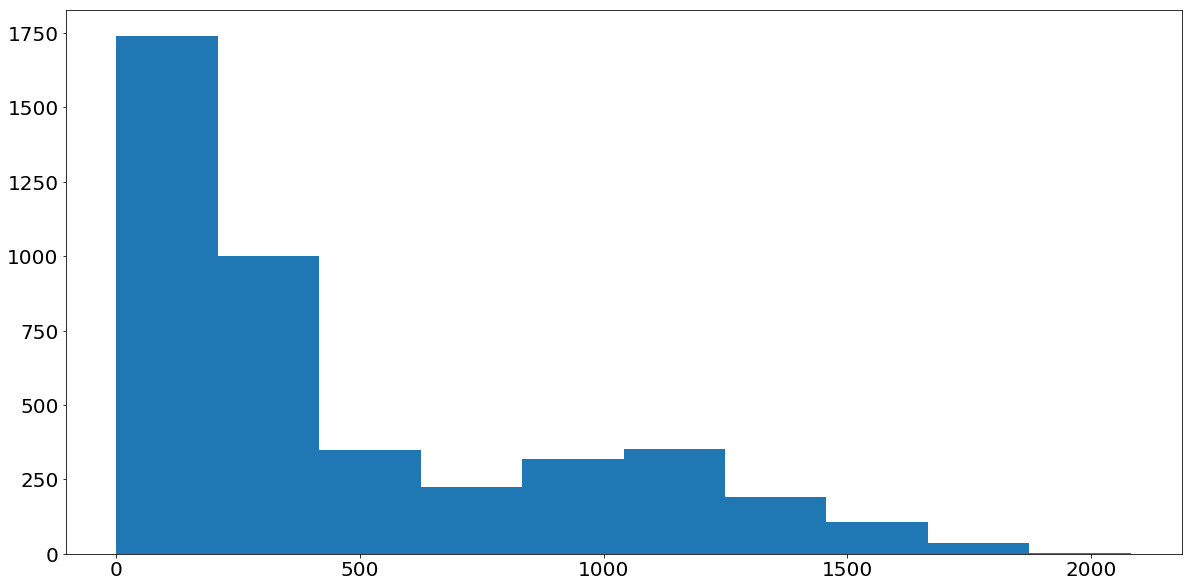

In [74]:
plt.hist(test_df[test_df['SiteId'] == 1]['TotalEntries'])

In [23]:
test_df[test_df['SiteId'] == 1]['TotalEntries'].groupby(test_df['date']).sum()

date
2018-11-27    15288
2018-11-28    27538
2018-11-29    28521
2018-11-30    28342
2018-12-01    21697
2018-12-02    12341
2018-12-03    28056
2018-12-04    28342
2018-12-05    28262
2018-12-06    20169
2018-12-07    26855
2018-12-08    22040
2018-12-09    12457
2018-12-10    27489
2018-12-11    27762
2018-12-12    28399
2018-12-13    27900
2018-12-14    26178
2018-12-15    21542
2018-12-16    13238
2018-12-17    27642
2018-12-18    28180
2018-12-19    28900
2018-12-20    27332
2018-12-21     9155
2018-12-22    10528
2018-12-23     8146
2018-12-24    16273
2018-12-25     7918
2018-12-26     9741
              ...  
2019-01-26    18489
2019-01-27    10300
2019-01-28    24645
2019-01-29    24425
2019-01-30    25029
2019-01-31    25475
2019-02-01    25383
2019-02-02    17790
2019-02-03    10822
2019-02-04    25230
2019-02-05    25494
2019-02-06    26184
2019-02-07    25827
2019-02-08    24997
2019-02-09    18222
2019-02-10     7258
2019-02-11    28144
2019-02-12    27086
2019-02-13    2

In [24]:
test_df[test_df['SiteId'] == 1]['date'].groupby(test_df['date']).min().size

90

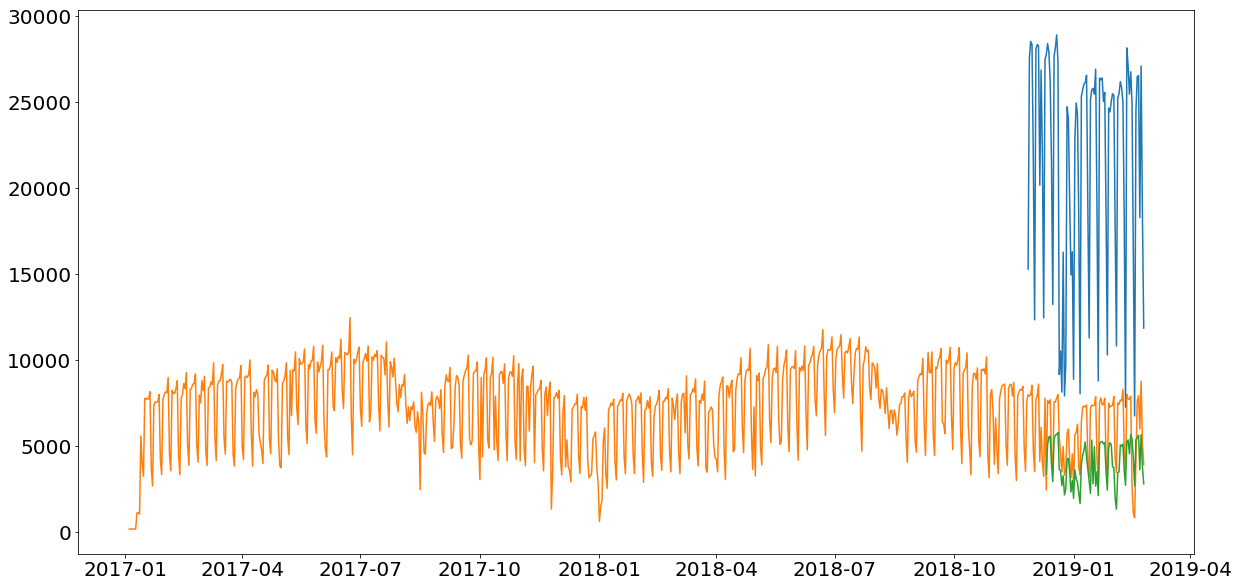

In [25]:
plt.plot(test_df[test_df['SiteId'] == 1]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 1]['TotalEntries'].groupby(test_df['date']).sum())
plt.plot(test_df[test_df['SiteId'] == 2]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 2]['TotalEntries'].groupby(test_df['date']).sum())
plt.plot(test_df[test_df['SiteId'] == 3]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 3]['TotalEntries'].groupby(test_df['date']).sum())

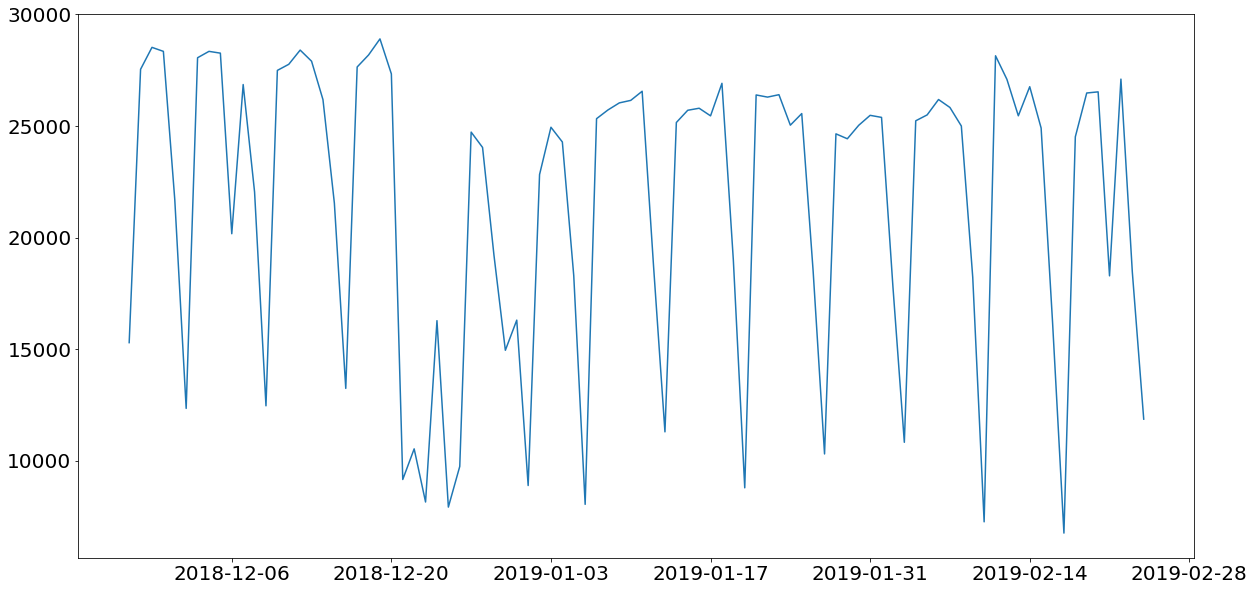

In [26]:
plt.plot(test_df[test_df['SiteId'] == 1]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 1]['TotalEntries'].groupby(test_df['date']).sum())

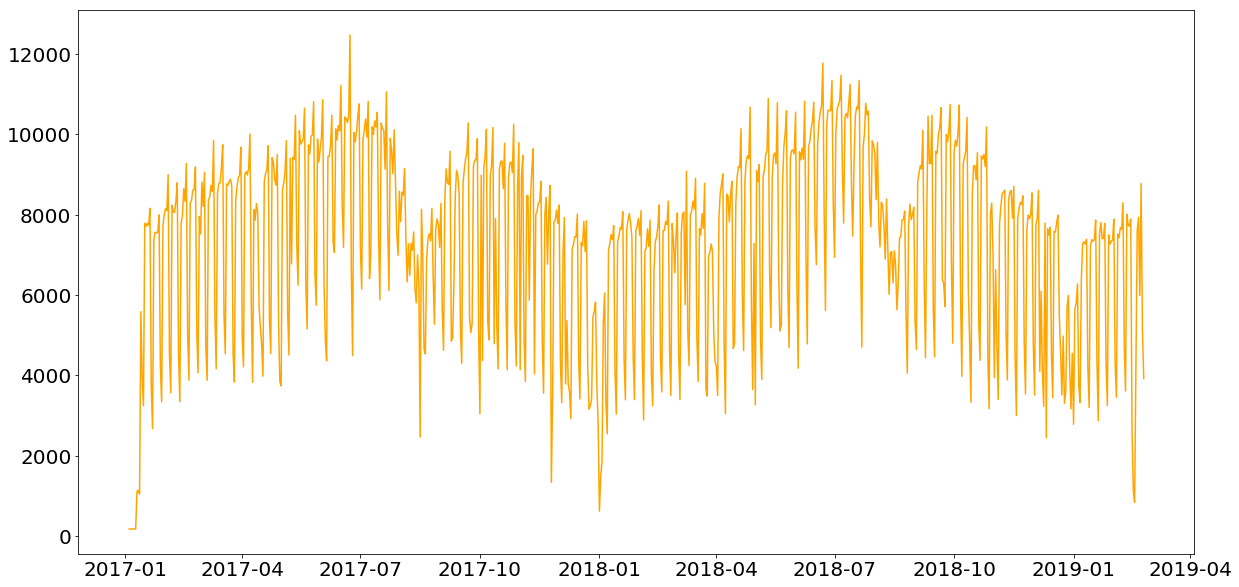

In [27]:
plt.plot(test_df[test_df['SiteId'] == 2]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 2]['TotalEntries'].groupby(test_df['date']).sum(), color='orange')

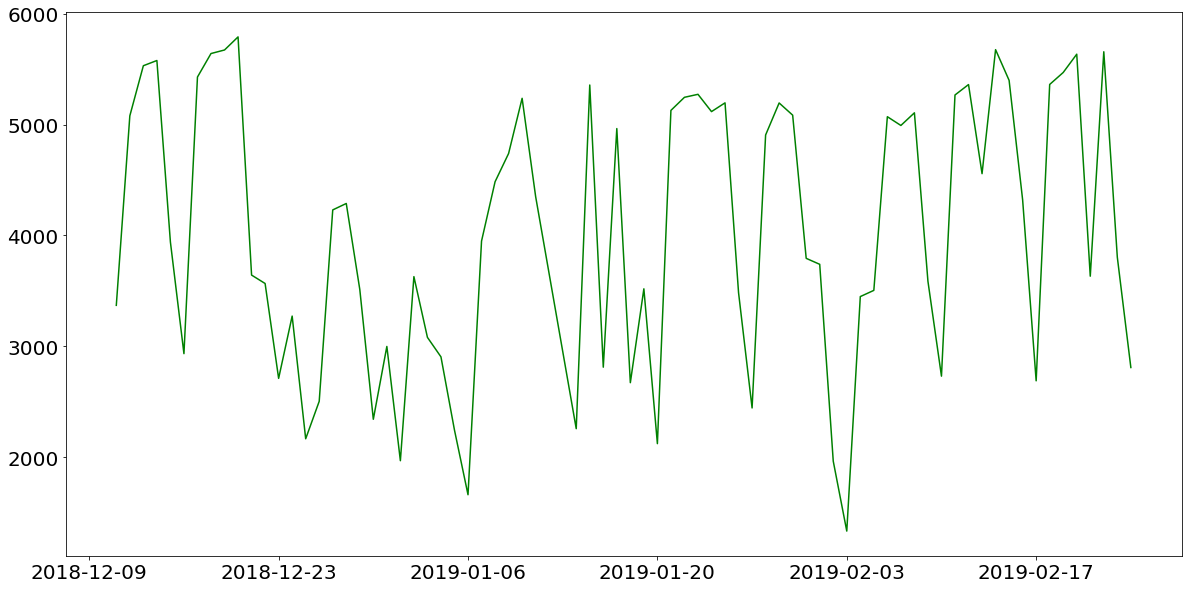

In [28]:
plt.plot(test_df[test_df['SiteId'] == 3]['date'].groupby(test_df['date']).min(), test_df[test_df['SiteId'] == 3]['TotalEntries'].groupby(test_df['date']).sum(), color='green')

In [29]:
original_df.groupby(original_df['Month']).mean()

,Id,CustomerId,SiteId,Year,Month,Day,Hour,Minute,TotalEntries,TotalOuts,...,WomenEntriesGroupAge_20_24,WomenEntriesGroupAge_25_29,WomenEntriesGroupAge_30_34,WomenEntriesGroupAge_35_39,WomenEntriesGroupAge_40_44,WomenEntriesGroupAge_45_49,WomenEntriesGroupAge_50_54,WomenEntriesGroupAge_55_59,WomenEntriesGroupAge_60_99,GeneratedByDaysPopulator
Month,,,,,,,,,,,,,,,,,,,,,
1,30873.047945,11.0,1.986301,2018.458904,1.0,16.595890,11.5,15.0,183.967323,195.941638,...,9.944207,14.591182,19.152112,20.507277,9.179366,4.379138,2.377711,2.224315,1.257563,0.0
2,31397.000000,11.0,2.000000,2018.343750,2.0,13.375000,11.5,15.0,185.882812,205.261230,...,9.653898,13.923723,18.693716,19.815860,8.767305,4.286626,2.379872,2.340894,1.279906,0.0
3,14304.500000,11.0,2.000000,2017.500000,3.0,16.000000,11.5,15.0,150.009073,181.919019,...,7.447245,10.772177,16.571909,17.422379,6.680444,3.034946,1.561828,1.470766,0.822917,0.0
4,15768.500000,11.0,2.000000,2017.500000,4.0,15.500000,11.5,15.0,153.065972,180.030556,...,7.374306,10.252431,15.989236,17.071875,7.134722,3.288194,1.738889,1.635069,0.907292,0.0
5,17232.500000,11.0,2.000000,2017.500000,5.0,16.000000,11.5,15.0,172.639449,200.024530,...,7.779570,10.282930,16.394153,18.211358,8.128696,3.771505,1.944556,1.817204,1.034274,0.0
6,18696.500000,11.0,2.000000,2017.500000,6.0,15.500000,11.5,15.0,190.364931,210.401736,...,7.735069,10.161458,16.495833,19.100694,9.108333,4.307986,2.217708,2.017014,1.069792,0.0
7,20160.500000,11.0,2.000000,2017.500000,7.0,16.000000,11.5,15.0,193.623320,215.512097,...,7.148858,9.567540,16.196237,19.186156,9.637433,4.652890,2.327285,2.148522,1.156922,0.0
8,21648.500000,11.0,2.000000,2017.500000,8.0,16.000000,11.5,15.0,149.605175,169.412970,...,5.201277,7.243280,12.236223,14.750000,7.500672,3.774866,1.923723,1.707997,0.923723,0.0
9,23112.500000,11.0,2.000000,2017.500000,9.0,15.500000,11.5,15.0,164.899653,186.729861,...,6.770833,8.916667,14.811111,16.955903,7.988889,3.827431,1.975000,1.812847,1.027083,0.0


In [30]:
original_df['TotalEntries'].groupby(original_df['Month']).mean()

Month
1     183.967323
2     185.882812
3     150.009073
4     153.065972
5     172.639449
6     190.364931
7     193.623320
8     149.605175
9     164.899653
10    162.450605
11    169.210938
12    195.774123
Name: TotalEntries, dtype: float64

<BarContainer object of 3 artists>

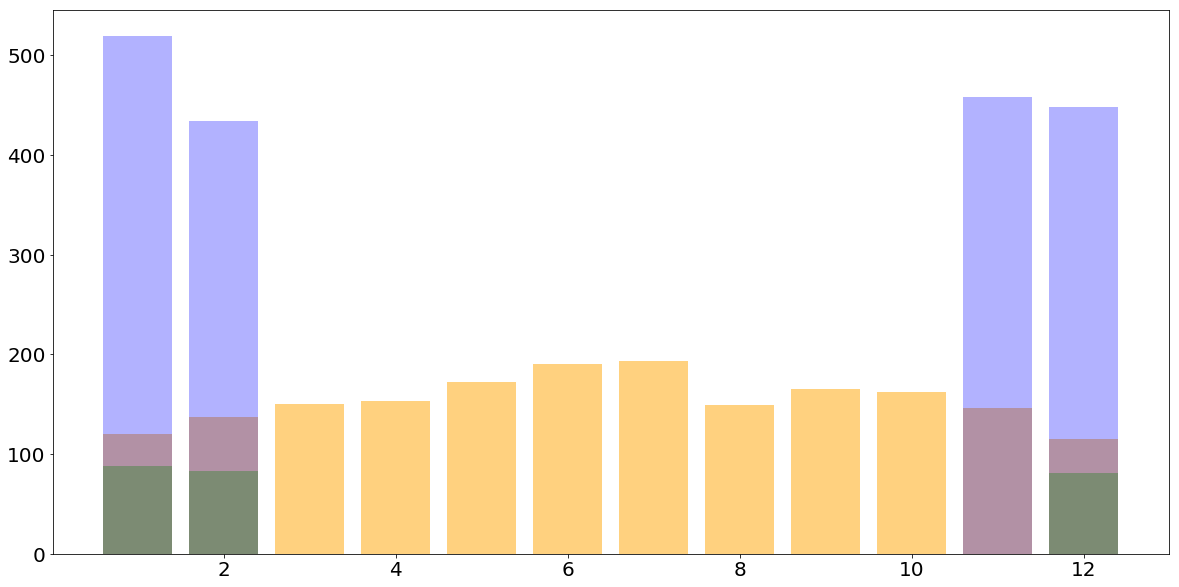

In [83]:
#30' average per month & SiteId
plt.bar(original_df[original_df['SiteId'] == 2]['Month'].unique(), original_df[original_df['SiteId'] == 2]['TotalEntries'].groupby(original_df['Month']).mean(), color='orange', alpha=0.5)
plt.bar(original_df[original_df['SiteId'] == 1]['Month'].unique(), original_df[original_df['SiteId'] == 1]['TotalEntries'].groupby(original_df['Month']).mean(), color='blue', alpha=0.3)
plt.bar(original_df[original_df['SiteId'] == 3]['Month'].unique(), original_df[original_df['SiteId'] == 3]['TotalEntries'].groupby(original_df['Month']).mean(), color='green', alpha=0.3)

In [ ]:
original_df[original_df['SiteId'] == 2]['TotalEntries'].groupby(original_df['Month']).mean(), color='orange', alpha=0.5)

A 30' average traffic per month is not an intuitive measure, the bar plot would be better understood averaging daily traffic per month. We cannot create another column in 'test_df' aggregating the TotalEntries values per date, since it would mix up values from all the buildings (raval_nord, maragall and jaume_I). Thus, we split the dataframe in 3 locations in order to apply the aggregating formula afterwards.

In [84]:
ravn_df = test_df[test_df['SiteId'] == 1]

In [85]:
jau_df = test_df[test_df['SiteId'] == 3]

In [86]:
marag_df = test_df[test_df['SiteId'] == 2]

In [87]:
ravn_df.shape

(4320, 7)

In [94]:
ravn_df['TotalDayEntries'] = ravn_df.groupby(ravn_df['date'])['TotalEntries'].transform(np.sum)

/home/quark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
marag_df['TotalDayEntries'] = marag_df.groupby(marag_df['date'])['TotalEntries'].transform(np.sum)

/home/quark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
jau_df['TotalDayEntries'] = jau_df.groupby(jau_df['date'])['TotalEntries'].transform(np.sum)

/home/quark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 3 artists>

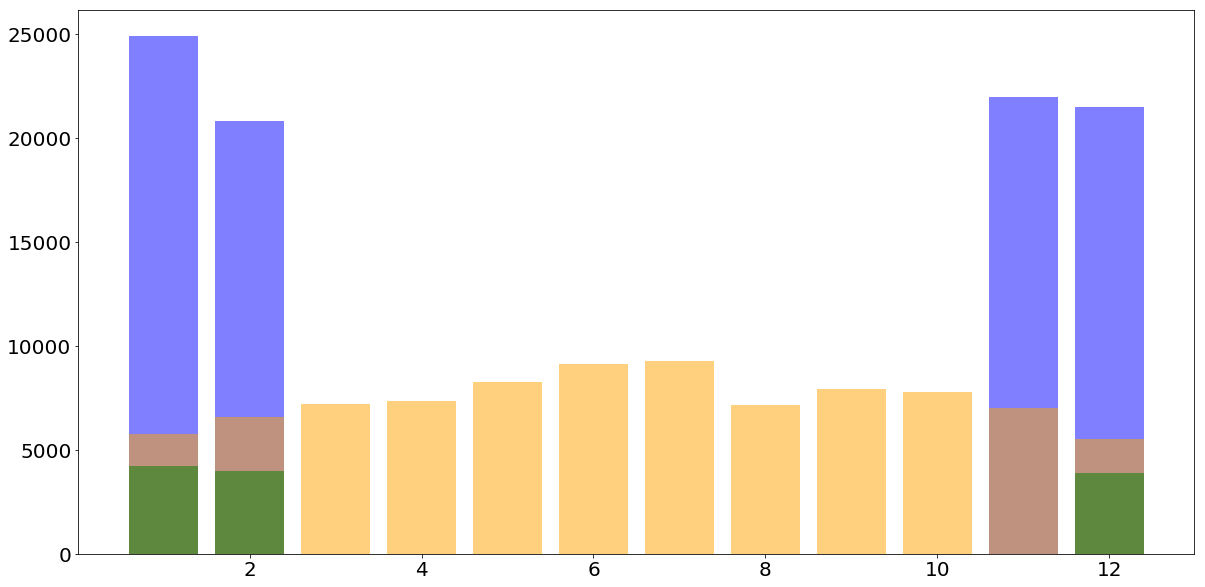

In [109]:
#Daily average per month & SiteId
plt.bar(ravn_df['date'].dt.month.unique(), ravn_df['TotalDayEntries'].groupby(ravn_df['date'].dt.month).mean(), color='blue', alpha=0.5)
plt.bar(marag_df['date'].dt.month.unique(), marag_df['TotalDayEntries'].groupby(marag_df['date'].dt.month).mean(), color='orange', alpha=0.5)
plt.bar(jau_df['date'].dt.month.unique(), jau_df['TotalDayEntries'].groupby(jau_df['date'].dt.month).mean(), color='green', alpha=0.5)

In [ ]:
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')
original_df['Timestamp'][:10]
original_df = original_df[['Timestamp', 'TotalEntries']]

In [7]:
bcn_meteocat_df = pd.read_csv('./../Databases/Meteocat/rarribas.01/X4Barcelona.csv', sep=';')
bcn_meteocat_df.head()

,EMA,DATA,T,TX,TN,PPT
0,X4,01.01.2017 00:00:00,10.4,10.5,10.4,0.0
1,X4,01.01.2017 00:30:00,10.3,10.4,10.2,0.0
2,X4,01.01.2017 01:00:00,10.1,10.2,9.9,0.0
3,X4,01.01.2017 01:30:00,10.0,10.2,9.9,0.0
4,X4,01.01.2017 02:00:00,10.0,10.1,9.8,0.0


In [8]:
bcn_meteocat_df.dtypes

EMA      object
DATA     object
T       float64
TX      float64
TN      float64
PPT     float64
dtype: object

In [11]:
bcn_meteocat_df['DATA'] = pd.to_datetime(bcn_meteocat_df['DATA']).apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
bcn_meteocat_df['DATA'] = pd.to_datetime(bcn_meteocat_df['DATA'])
bcn_meteocat_df.dtypes

EMA             object
DATA    datetime64[ns]
T              float64
TX             float64
TN             float64
PPT            float64
dtype: object

In [14]:
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')
original_df['Timestamp'][:10]
original_df = original_df[['Timestamp', 'TotalEntries']]

In [17]:
merged_df = original_df.merge(bcn_meteocat_df.drop('EMA', axis = 1), how='inner', left_on='Timestamp', right_on='DATA')
merged_df.head()

,Timestamp,TotalEntries,DATA,T,TX,TN,PPT
0,2017-01-04 00:00:00,0,2017-01-04 00:00:00,14.4,14.7,14.3,0.0
1,2017-01-04 00:30:00,0,2017-01-04 00:30:00,14.5,14.6,14.3,0.0
2,2017-01-04 01:00:00,0,2017-01-04 01:00:00,14.1,14.4,14.0,0.0
3,2017-01-04 01:30:00,0,2017-01-04 01:30:00,14.0,14.2,13.9,0.0
4,2017-01-04 02:00:00,0,2017-01-04 02:00:00,14.3,14.4,14.1,0.0


In [21]:
bcn_meteocat_df.isnull().sum()

EMA     0
DATA    0
T       0
TX      0
TN      0
PPT     0
dtype: int64